In [1]:
!pip install Prophet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
from google.colab import files
uploaded = files.upload()

tencent_df  = pd.read_csv(
    "tencent_Stock.csv")

display(tencent_df.head())
display(tencent_df.tail())

Saving tencent_Stock.csv to tencent_Stock (1).csv


,Date,TICKER,Open,High,Low,Close,Volume,Currency
0,2010-01-04,TCEHY,4.366,4.416,4.366,4.416,61480,USD
1,2010-01-05,TCEHY,4.474,4.480,4.410,4.452,75690,USD
2,2010-01-06,TCEHY,4.480,4.482,4.470,4.482,56010,USD
3,2010-01-07,TCEHY,4.298,4.300,4.254,4.300,49355,USD
4,2010-01-08,TCEHY,4.290,4.360,4.290,4.358,25530,USD


,Date,TICKER,Open,High,Low,Close,Volume,Currency
3185,2022-08-29,TCEHY,41.02,41.675,40.74,40.740,1977550,USD
3186,2022-08-30,TCEHY,40.75,40.990,39.60,40.025,4559448,USD
3187,2022-08-31,TCEHY,41.45,41.900,41.20,41.370,3960398,USD
3188,2022-09-01,TCEHY,41.25,41.374,40.71,41.240,3240642,USD
3189,2022-09-02,TCEHY,41.81,42.154,41.42,41.420,3294829,USD


In [6]:
prophet_df = tencent_df[['Date', 'Close']]
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1flf68oz/euhd5sv4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1flf68oz/idg4hojm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3914', 'data', 'file=/tmp/tmp1flf68oz/euhd5sv4.json', 'init=/tmp/tmp1flf68oz/idg4hojm.json', 'output', 'file=/tmp/tmp1flf68oz/prophet_modeli0vkpahr/prophet_model-20230721023256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:32:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:32:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
future_dates = model.make_future_dataframe(periods= 2000, freq='D')

In [8]:
forecast = model.predict(future_dates)

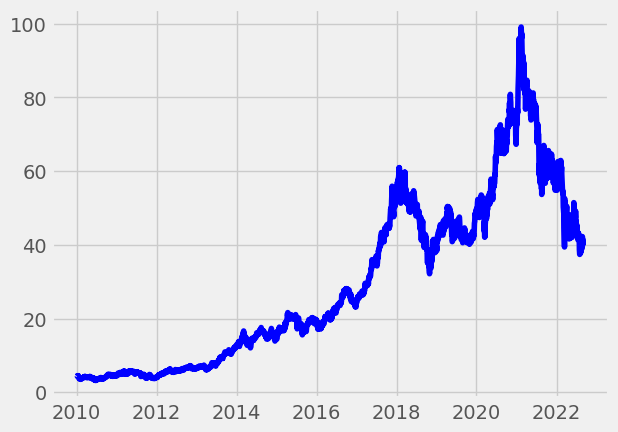

In [9]:
plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


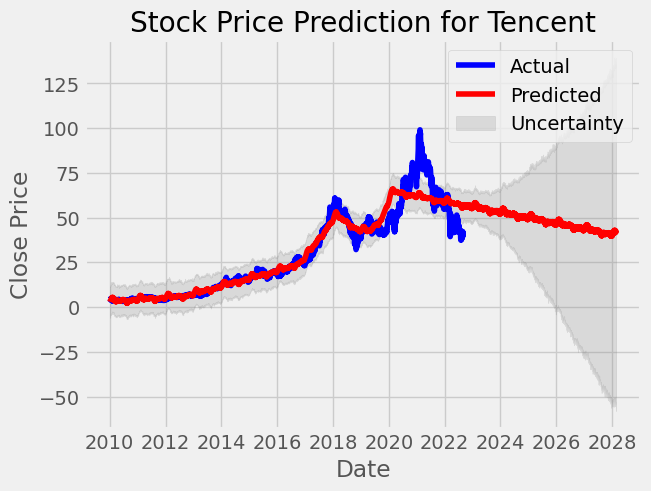

In [10]:

plt.plot(prophet_df['ds'], prophet_df['y'], color='blue', label='Actual')


plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Predicted')


plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction for Tencent')
plt.legend()
plt.show()